<a href="https://colab.research.google.com/github/kha199/Machine-Learning/blob/main/heart_attack_detection_using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing 

In [214]:
df = pd.read_csv("heart_failure.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [215]:
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
  
df['age']= label_encoder.fit_transform(df['age'])
df['anaemia']= label_encoder.fit_transform(df['anaemia'])
df['creatinine_phosphokinase']= label_encoder.fit_transform(df['creatinine_phosphokinase'])
df['diabetes']= label_encoder.fit_transform(df['diabetes'])
df['high_blood_pressure']= label_encoder.fit_transform(df['high_blood_pressure'])
df['platelets']= label_encoder.fit_transform(df['platelets'])
df['sex']= label_encoder.fit_transform(df['sex'])
df['smoking']= label_encoder.fit_transform(df['smoking'])
df['time']= label_encoder.fit_transform(df['time'])
df['DEATH_EVENT']= label_encoder.fit_transform(df['DEATH_EVENT'])

In [216]:
df.shape

(299, 13)

In [217]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [218]:
x = df[["age","anaemia","creatinine_phosphokinase","diabetes","high_blood_pressure","platelets","sex","smoking","time"]]
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,high_blood_pressure,platelets,sex,smoking,time
0,34,0,144,0,1,93,1,0,0
1,15,0,207,0,0,91,1,0,1
2,26,0,66,0,0,26,1,1,2
3,10,1,44,0,0,49,1,0,2
4,26,1,74,1,0,133,0,0,3


In [219]:
y = df[["DEATH_EVENT"]]
y.head()

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1


In [220]:
y["DEATH_EVENT"].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [221]:
df.dtypes

age                           int64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                     int64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [222]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,high_blood_pressure,platelets,sex,smoking,time
0,34,0,144,0,1,93,1,0,0
1,15,0,207,0,0,91,1,0,1
2,26,0,66,0,0,26,1,1,2
3,10,1,44,0,0,49,1,0,2
4,26,1,74,1,0,133,0,0,3


**TRAIN TEST**

In [224]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

**MODEL**

In [225]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='saga')
LR.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

**PREDICTION**

In [226]:
y_hat = LR.predict(x_test)
y_hat

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1])

**ACCURACY SCORE**

In [228]:
from sklearn import metrics

print("Logistic Regression Accuracy:", metrics.accuracy_score(y_test,y_hat))

Logistic Regression Accuracy: 0.7833333333333333


**CONFUSION METRICS**

In [229]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_hat)
cm

array([[36,  6],
       [ 7, 11]])

Text(69.0, 0.5, 'Actual Values')

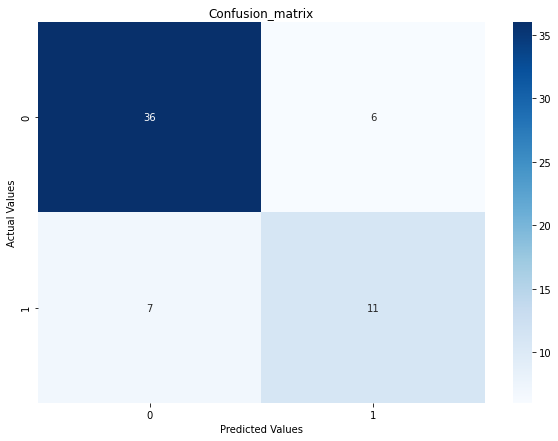

In [230]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

**CLASSIFICATION REPORT**

In [231]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        42
           1       0.65      0.61      0.63        18

    accuracy                           0.78        60
   macro avg       0.74      0.73      0.74        60
weighted avg       0.78      0.78      0.78        60



**LOG LOSS**

In [232]:
from sklearn.metrics import log_loss

print(log_loss(y_test,y_hat))

7.483481511973667


**F1 SCORE**

In [233]:
from sklearn.metrics import f1_score

print(f1_score(y_test, y_hat, average='weighted'))

0.7815126050420169
